## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# DATA DEFINITION -

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

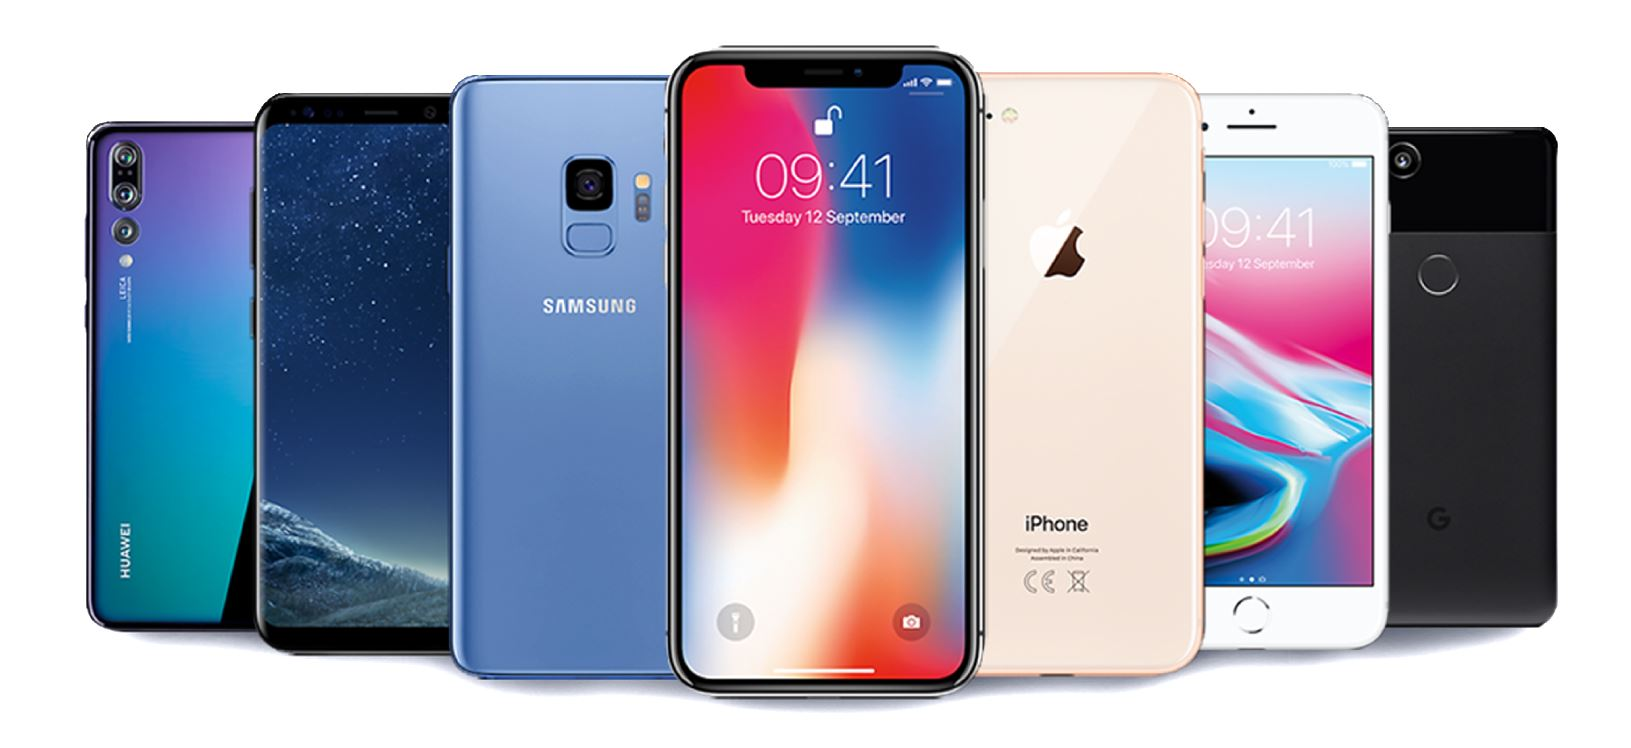

###   “The moment you make a mistake in pricing, you're eating into your reputation or your profits.”   
                                                               - Katharine Paine (founder and CEO of KDPaine & Partners LLC)


We are in an era of mobile phone revolution, where the changes in a span of less than a decade have been so dramatic that many have come to realise that they can’t think of a life without a mobile phone. The dependibility of people on their phone created a huge demand in the phone market, due to which many new players (phone Brands) entered the market. Today, phone market is considered as a highly competitive market and one has to do adequate research before entering or launching their new product.Harvard studies have found that a 1% improvement in your pricing can add up to 11% to your profits. With bad pricing, you’re missing out on profits in every transaction that you make, not to mention the deals that you completely miss out on. Pricing is also a big factor in your branding and reputation. Prices that are too high can make you come off as arrogant, while prices that are too low can call the quality of your product into question.

We have been provided a dataset with name ***"data_mobile_price_range"***, which we have to analyse in order to identify the factors which drives the phone price. For this, we will perform exploratory data analysis in the provided data and will try to draw some useful insights and correlations between price range and phone features. 
Further, we will create a Supervised ML classification model which would help the company to predict/decide the pricing of a phone depending on the given phone features.

To achieve above objective, we have divided the task into following steps :
    
    1.  Understand The Data    
    2.  Data Cleaning- Getting Data Ready to Analyse
    4.  Discovering Information - Analysis
    5.  Feature Engineering 
    6.  Model Fitting
    7.  Hyperparameter Tuning
    8.  Cross Validation
    9.  Conclusion
    
Let's start with **importing important libraries** which will be useful in the excercise.

In [1]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

It's time to mount our google drive with the notebook and import our mine - **"data_mobile_price_range"** dataset.

In [2]:
# Mount the google drive 

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Importing the dataset

df = pd.read_csv(r'C:\Users\rankiz\Desktop\Alma Better\Capstone Project\ML-Supervised Classification\data_mobile_price_range.csv')

We have imported our dataset and it is time to understand the data. Launching first step of our task.....

# 1. Understand The Data

Understanding new data is like understanding a new person. You first interact , observe their personality and then assess them. We are going to follow same with our dataset.
 
   * The First Interaction : We will explore top and bottom few rows of our data 
   * Observe the Features : Then we will check all the variables and their definition
   * Assessing : After that we will see size data , information of variables and statistical description of numerical variables
   
It's time for the action : **The First Interaction !**

In [8]:
# Display top 5 rows 

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Display bottom 5 rows 

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


The data seems interesting from the first look. We understood there are good number of variables and it seems all or most of them have numerical values in them. Let us have a close look on our variables.
Initiating second step of data exploration : **Observe the Features**

In [36]:
# Display shape of data
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

#Display column names
print(f'Our dataset has following columns - {list(df.columns)}')

Our dataset has 2000 rows and 21 columns.
Our dataset has following columns - ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


We have been also provided a document which gives definitions of the above 21 variables. Let us take a look on their **definitions** :

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

Let us move ahead and execute third step of our data exporation : **Assessing the Data**

In [19]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All numerical values !! That is nice . Just two variables are of float type and rest 19 are of int type. Let us take a look on their **statistical description and number of unique values** they have.

In [47]:
# Display statistical data of all columns with numerical values
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
# Display number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### What We Understood !
We have explored our dataset which consists of **2000 rows and 21 columns**. On going through all varibales, we identified **'price_range' as our dependent variable**. On taking a look of all unique values we found that our variables have two types of data- continous and discrete type. Variables like 'blue', 'dual_sim','four_g','three_g','touch_screen','wifi' have **discrete values.**

#  2. Data Cleaning - Making Data Ready To Analyse
Our next task is to clean our data and get it ready for the analysation part. For data cleaning we will look for **duplicate values, Null/Missing values and Outliers** and will try to eliminate then if and when required.

In [ ]:
 # Display null values numbers in each column
df.isnull().sum()

None of the columns have null value in it !!

In [41]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our data')
else:
    print ('There are duplicate rows in our data')

There are no duplicate rows in our data


That's great !! Looks like we have got a cleaned data. It's time to look for **Outliers -**

### Checking For Outliers !!

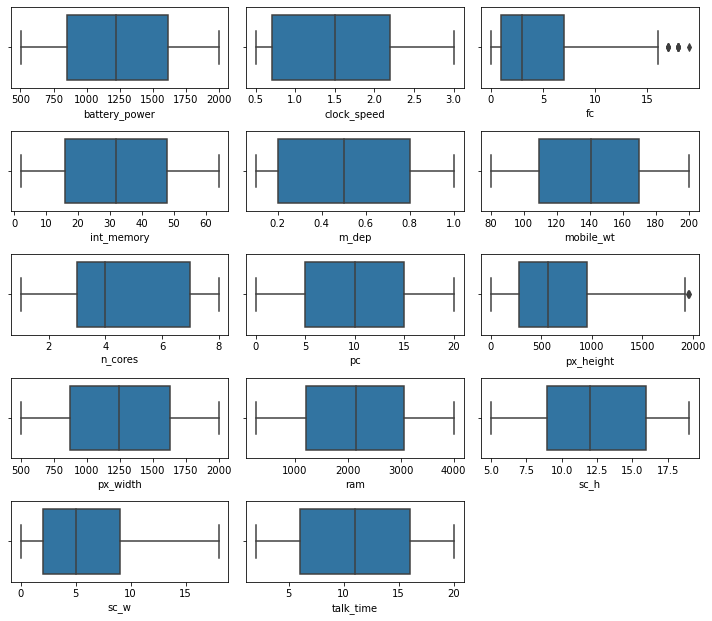

In [45]:
#Create figure object
fig = plt.subplots(figsize=(10,10))

# Create boxplot for each numerical variable
for i,j in enumerate(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc','px_height','px_width','ram', 'sc_h','sc_w','talk_time']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

Only 'fc' variable (which tells about front camera megapixel) and px_height variable (which tells about pixels heights) , have very very few countable outliers and their values also lies in an acceptable range. Hence, it is better to leave those outliers unattended.

We have made our data ready to analayse....or have we ?? Well, our data has been cleaned but still there are some scope to make our data easy to analyse. Let's start doing feature engineering.

# Feature Engineering

### Deriving new variable from sc_h and sc_w

Both sc_h and sc_w variables tells about the screen dimensions (screen height and width respectively). We use these information to derive a single variable , **sc_area** , which can replace these two.

In [50]:
# Creating a new column which gives the screen area size of the mobiles
df['sc_area']=df['sc_w']*df['sc_h']
# Drop sc_h and sc_w variable
df.drop(['sc_w','sc_h'],inplace=True,axis=1)

### 2. Deriving new variable from px_height and px_width
Both px_height and px_width variables talks about the pixels dimensions (pixel height and width respectively). We use these information to derive a new variable , **px_size** , which can replace these two.


In [49]:
# Creating a new column which gives the pixel size of the mobiles
df['px_size']=df['px_width']*df['px_height']
# Drop px_width and px_height variable
df.drop(['px_width','px_height'],inplace=True,axis=1)